In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [2]:
#food_data = pd.read_excel("../COP28_delegates_food_organizations_renamed_filtered.xlsx")
food_data = pd.read_excel("../COP28_delegates_meat&dairy_renamed_filtered_checked.xlsx")
food_data["count"] = 1

In [3]:
party_names = pd.read_csv("../../orgs/org_list_party.csv",encoding = 'utf8')
ngo_names = pd.read_csv("../../orgs/org_list_ngo.csv",encoding = 'utf8')
ngo_names_match = pd.read_excel("../../orgs/org_list_ngo_check.xlsx",sheet_name="match")

In [4]:
main_groups = food_data.copy()

# add party names
for i in main_groups.index:
    nominator = main_groups.loc[i,"nominator"]
    if nominator == "Turkiye":
        nominator = "Türkiye"
    
    # party members
    if nominator in party_names["party"].unique(): 
        main_groups.loc[i,"nominator_type"] = main_groups.loc[i,"type"]
        main_groups.loc[i,"country"] = nominator
        main_groups.loc[i,"nominator_rename"] = nominator + "  "
    # non party organizations
    elif nominator in ngo_names_match["nominator"].unique(): 
        matched_name = ngo_names_match.query("nominator==@nominator")["matched_name"].iloc[0]
        matched_name = matched_name.replace("Ã³","ó").replace("Ã§","ç").replace("Ã©","é").replace("Ã±","ñ").replace("Ã£","ã")
        main_groups.loc[i,"nominator_type"] = ngo_names.query("Organization==@matched_name")["Constituency"].iloc[0].replace(" CAN","")
        main_groups.loc[i,"country"] = ngo_names.query("Organization==@matched_name")["Country"].iloc[0]
        main_groups.loc[i,"nominator_rename"] = nominator
    elif nominator in ["Host country guests","Conference Invitees","Host Country Badges - COP 28"]:
        main_groups.loc[i,"nominator_type"] = "Host"
        main_groups.loc[i,"country"] = "United Arab Emirates"
        main_groups.loc[i,"nominator_rename"] = "Host country guests"
    elif nominator in ["World Bank Group","Global Climate Action"]:
        main_groups.loc[i,"nominator_type"] = "United Nations Organization"
        main_groups.loc[i,"country"] = "International"
        main_groups.loc[i,"nominator_rename"] = nominator
    elif nominator in ["League of Arab States"]:
        main_groups.loc[i,"nominator_type"] = "Intergovernmental Organizations"
        main_groups.loc[i,"country"] = "International"
        main_groups.loc[i,"nominator_rename"] = nominator
main_groups = main_groups.drop(columns="type")
main_groups = pd.merge(main_groups,party_names[["party","type"]],left_on="country",right_on="party",how="left")
main_groups = main_groups.rename(columns={"type":"country_type"})
main_groups["country_type"] = main_groups["country_type"].fillna("Non-Country")
#main_groups.set_index("nominator").to_csv("test.csv")
main_groups

,nominator,name,func_title,department,organization,relation,new_organization,count,nominator_type,country,nominator_rename,party,country_type
0,Thailand,Mr. Somjettana Pasakanon,DIRECTOR OF SUSTAINABILITY DEVELOPMENT,"CHAROEN POKPHAND GROUP CO., LTD.","CHAROEN POKPHAND GROUP CO., LTD.",Choose not to disclose,Charoen Pokphand,1,Parties,Thailand,Thailand,Thailand,Non-Annex
1,Australia,Gracie Verde Selva,Executive Manager,Sustainability,Minerva Foods,Stakeholder,Minerva Foods,1,Party overflow,Australia,Australia,Australia,Annex II
2,Brazil,Mr. SalomÃ£o Abib,Corporate Sustainability Coordinator,Sustainability,Minerva Foods,Guest of the nominating entity,Minerva Foods,1,Party overflow,Brazil,Brazil,Brazil,Non-Annex
3,Brazil,Ms. Andrea Aguiar Azevedo,Executive director,Programs and Project,JBS Fund for the Amazon,Guest of the nominating entity,JBS,1,Party overflow,Brazil,Brazil,Brazil,Non-Annex
4,Brazil,Mr. Frederico Alcantara de Queiroz,Chief Operating Officer,Related Business,Minerva Foods,Guest of the nominating entity,Minerva Foods,1,Party overflow,Brazil,Brazil,Brazil,Non-Annex
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,World Business Council for Sustainable Develop...,Ms. Salma Faisal Selim Elhalaby,MENA Head of Sustainability & CSV,Corporate Affairs & Sustainability,Nestle,Guest of the nominating entity,Nestle,1,Constituency - Business and Industry,Switzerland,World Business Council for Sustainable Develop...,Switzerland,Annex II
84,World Business Council for Sustainable Develop...,Ms. Haya Shanata,Communication Manager,Communication,Danone,Guest of the nominating entity,Danone,1,Constituency - Business and Industry,Switzerland,World Business Council for Sustainable Develop...,Switzerland,Annex II
85,Global Climate Action,Ms. Nahla Kamal,Director,Sustainability and Corporate Affairs,Nestle,MP,Nestle,1,United Nations Organization,International,Global Climate Action,NaN,Non-Country
86,Host Country Badges - COP 28,Ms. Suzanne Camargo De Colon,Board Member,Board,Minerva Foods,Guest of the nominating entity,Minerva Foods,1,Host,United Arab Emirates,Host country guests,United Arab Emirates,Non-Annex


In [5]:
main_groups[main_groups["nominator"]=="League of Arab States"]

,nominator,name,func_title,department,organization,relation,new_organization,count,nominator_type,country,nominator_rename,party,country_type
61,League of Arab States,Mr. Hesham Abdelbary,Expert,Nestle,Nestle,Partner/sponsorship of the nominating entity,Nestle,1,Intergovernmental Organizations,International,League of Arab States,NaN,Non-Country
62,League of Arab States,Mr. Yasser Abdul Malak,Expert,Nestle,Nestle,Partner/sponsorship of the nominating entity,Nestle,1,Intergovernmental Organizations,International,League of Arab States,NaN,Non-Country
63,League of Arab States,Ms. Karine Antoniades,Expert,Nestle,Nestle,Partner/sponsorship of the nominating entity,Nestle,1,Intergovernmental Organizations,International,League of Arab States,NaN,Non-Country
64,League of Arab States,Ms. Michele Dagher,Expert,Nestle,Nestle,Partner/sponsorship of the nominating entity,Nestle,1,Intergovernmental Organizations,International,League of Arab States,NaN,Non-Country
65,League of Arab States,Ms. Layal Dalal,Expert,Nestle,Nestle,Partner/sponsorship of the nominating entity,Nestle,1,Intergovernmental Organizations,International,League of Arab States,NaN,Non-Country
66,League of Arab States,Mr. Hassan ElDabaa,Manager,Nestle,Nestle,Partner/sponsorship of the nominating entity,Nestle,1,Intergovernmental Organizations,International,League of Arab States,NaN,Non-Country
67,League of Arab States,Ms. Dina Mohamed,Expert,Nestle,Nestle,Partner/sponsorship of the nominating entity,Nestle,1,Intergovernmental Organizations,International,League of Arab States,NaN,Non-Country
68,League of Arab States,Mr. Alain Tamas Riesterer,Expert,Nestle,Nestle,Partner/sponsorship of the nominating entity,Nestle,1,Intergovernmental Organizations,International,League of Arab States,NaN,Non-Country


In [6]:
# highlight those with more than 10 delegates
# countries in the country list 
country_summary = main_groups.groupby("country").sum()[["count"]]
country_summary = country_summary[country_summary["count"]>=5]
country_summary

,count
country,
Brazil,34
France,9
International,9
Thailand,17


In [7]:
# companies 
company_summary = main_groups.groupby("new_organization").sum()[["count"]]
company_summary = company_summary[company_summary["count"]>=5]
company_summary

,count
new_organization,
BRF,6
Charoen Pokphand,17
Danone,9
JBS,11
Minerva Foods,18
Nestle,16


In [8]:
party_nominator = main_groups[main_groups["nominator_type"].isin(["Parties","Party overflow"])]
party_nominator_list = list(party_nominator["nominator_rename"].dropna().unique())
party_nominator_nonannex_list = list(party_nominator.query("country_type=='Non-Annex'")["nominator_rename"].dropna().unique())
party_nominator_summary = main_groups.groupby("nominator_rename").sum()[["count"]]
party_nominator_summary = party_nominator_summary[party_nominator_summary["count"] >= 5]
party_nominator_summary

,count
nominator_rename,
Brazil,33
International Chamber of Commerce,5
League of Arab States,8
Thailand,17


In [26]:
# NODES
country_type_list = list(main_groups["country_type"].unique())
country_list = list(main_groups["country"].unique())
country_list_noInt = [item for item in country_list if item !="International" ]
org_type_list = list(main_groups["nominator_type"].dropna().unique())
nominator_list = list(main_groups["nominator_rename"].dropna().unique())
ff_company_list = list(main_groups["new_organization"].unique())
ngo_list = list(ngo_names["Constituency"].unique())

index_db = pd.DataFrame(data={"name":country_type_list+country_list+org_type_list+nominator_list+ff_company_list})
index_db = index_db.reset_index().rename(columns={"index":"code"})

for i in index_db.index:
    # colors
    if index_db.loc[i,"name"] in country_type_list[:-1]+country_list_noInt+party_nominator_list:
        index_db.loc[i,"color"] = "palevioletred"
        if index_db.loc[i,"name"] in list(["Non-Annex"])+list(main_groups[main_groups["country_type"]=="Non-Annex"]["country"].unique())+party_nominator_nonannex_list:
            index_db.loc[i,"color"] = "purple"
    elif index_db.loc[i,"name"] in ngo_list+list(main_groups[main_groups["nominator_type"].isin(ngo_list)]["nominator_rename"].unique()):
        index_db.loc[i,"color"] = "dodgerblue"
        if index_db.loc[i,"name"] in list(["Constituency - Business and Industry"])+list(main_groups[main_groups["nominator_type"]=="Constituency - Business and Industry"]["nominator"].unique()):
            index_db.loc[i,"color"] = "navy"
    else:
        index_db.loc[i,"color"] = "gray"
        
    # names to show
    if index_db.loc[i,"name"] in country_type_list+org_type_list+list(company_summary.index)+list(country_summary.index)+list(party_nominator_summary.index):
        index_db.loc[i,"name_show"] = index_db.loc[i,"name"] 

index_db["name_show"] = index_db["name_show"].fillna("")
index_db["name_show"] = index_db["name_show"].str.replace("Constituency -","NGO")
index_db["name_show"] = index_db["name_show"].str.replace("International Chamber of Commerce","ICC")
index_db["name_show"] = index_db["name_show"].str.replace("Intergovernmental Organizations","IGO")
index_db["name_show"] = index_db["name_show"].str.replace("United Nations Organization","United Nations")
index_db["name_show"] = index_db["name_show"].str.replace("League of Arab States","LAS")
index_db.set_index("code").to_excel("nodes_food.xlsx")
index_db

,code,name,color,name_show
0,0,Non-Annex,purple,Non-Annex
1,1,Annex II,palevioletred,Annex II
2,2,Non-Country,gray,Non-Country
3,3,Thailand,purple,Thailand
4,4,Australia,palevioletred,
5,5,Brazil,purple,Brazil
6,6,China,purple,
7,7,Denmark,palevioletred,
8,8,France,palevioletred,France
9,9,New Zealand,palevioletred,


In [27]:
def calc_link(db,index_db,left_name,right_name,plot_type):
    result_link = db.groupby([left_name,right_name]).sum()[["count"]].reset_index()
    if plot_type==0:
        result_link = pd.merge(result_link,index_db[["name","code","color"]],left_on=left_name,right_on="name")
    elif plot_type==1:
        result_link = pd.merge(result_link,index_db[["name","code"]],left_on=left_name,right_on="name")
    result_link = result_link.rename(columns={"code":"source_index"})
    if plot_type==0:
        result_link = pd.merge(result_link,index_db[["name","code"]],left_on=right_name,right_on="name")
    elif plot_type==1:
        result_link = pd.merge(result_link,index_db[["name","code","color"]],left_on=right_name,right_on="name")
    result_link = result_link.rename(columns={"code":"target_index"})
    result_link = result_link[["source_index","target_index","count","color"]]
    result_link = result_link.replace("palevioletred","#fbf1f4").replace("purple","#f2e6f2").replace("navy","#e6e6f2").replace("dodgerblue","#e9f4ff").replace("gray","#f2f2f2")
    return result_link

In [28]:
# LINKS
# country type to country
cntry_type = calc_link(main_groups,index_db,"country_type","country",0)
# country to nominator type
cntry2nomtype = calc_link(main_groups,index_db,"country","nominator_type",0)
# nominator type to nominator
nomtype2nom = calc_link(main_groups,index_db,"nominator_type","nominator_rename",1)
# nominator to company
nom2comp = calc_link(main_groups,index_db,"nominator_rename","new_organization",0)
combined_list = pd.concat([cntry_type,cntry2nomtype,nomtype2nom,nom2comp])
combined_list.set_index("source_index").to_excel("links_food.xlsx")

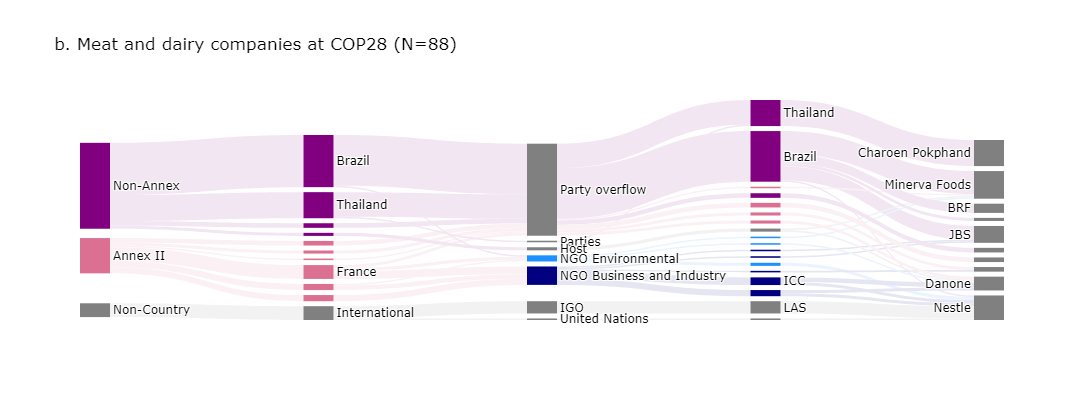

In [29]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 5,
      thickness = 30,
      line = dict(color = "black", width = 0),
      #label = index_db["name"],
      label=  index_db["name_show"].str.replace("Constituency -","NGO"),
      color = index_db["color"]
    ),
    link = dict(
      source = combined_list["source_index"], 
      target = combined_list["target_index"],
      value = combined_list["count"],
        color = combined_list["color"]
    ))],
       layout =  dict(
    title = "b. Meat and dairy companies at COP28 (N=88)",
    height = 400,
    width = 1000,
    font = dict(
      size = 12,
        color="black"
    )        ))

fig.show()
fig.write_image("sankey_food.png", scale=2)